# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [3]:
def f(x):
    y = (x**2) * numpy.sin(x)
    return y
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE

Ensure your function works with numpy arrays:

In [4]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [5]:
def g(x):
    y = (2*x*numpy.sin(x) - (x**2 - 2)*numpy.cos(x)) - 2
    return y
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE

Check your solution with the same numpy array:

In [6]:
assert g(0) == 0.

In [7]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [8]:
def integrate_analytic(xmin, xmax):
    ymax = g(xmax)
    ymin = g(xmin)
    return (ymax - ymin)
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE

Check your analytic function:

In [9]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [22]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    dx = (xmax-xmin)/(N)
    x = numpy.linspace(xmin, xmax, N+1)
    x_half = numpy.linspace(xmin+dx/2, xmax-dx/2, N)
    
    S = f(x[0])
    S += f(x[len(x)-1])
    for i in range (1,len(x)-1):
        S += 2*f(x[i])     
    for i in range (0,len(x_half)):
        S += 4*f(x_half[i])
    S *= (dx/6)
    
    return S

Make sure you have implemented Simpson's rule correctly:

In [23]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [24]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


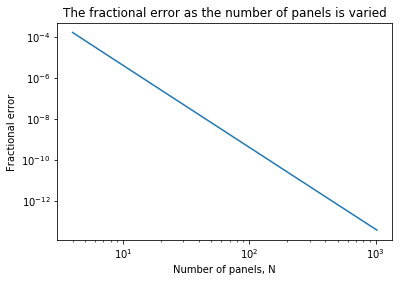

In [25]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
result_numeric = []
fractional_error = []
for i in range (0, len(panel_counts)):
    result_numeric.append(integrate_numeric(x0, x1, panel_counts[i]))
    fractional_error.append((result_analytic - result_numeric[i])/result_analytic)
plt.plot(panel_counts, fractional_error)
plt.yscale('log')
plt.xscale('log')
plt.title('The fractional error as the number of panels is varied')
plt.xlabel('Number of panels, N')
plt.ylabel('Fractional error')
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

There are two regimes to consider. The first regime is one where no numerical errors are incurred, which occurs when the number of panels is at least bigger than 10^3 (see graph). In this regime, the fractional error goes as N^(-4) (seen by the gradient of the log-log plot), which is a better rate than both the trapezium and rectangular rules (but less than higher order polynomials, with a few exceptions).

The second regime is when the number of panels is large. Since a large number of panels leads to a small dx, and an even smaller midpoint seperation, numerical errors can make themselves known. As described in the previous exercise, a numerical error affects particularly small numbers, where the machine can only store numbers to a fininite precision, and so rounding errors can creep into calculations in a (seemingly) random way. If calculated by hand, there is no theoretical minimum to the fractional error, but will take increasingly long amounts of time.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

With the trapezium rule, rather than the fractional error going as N^(-4) as with the Simpons rule method, the fractional error goes as N^(-2). This means that in order to the calculate an integral to the same level of accuracy, twice the number of panels will be needed - often incurring numerical errors sooner. It is, however, slightly quicker to perform this calculation, so if the functino is well behaved over a large range and not many panels are needed, there could be a time advantage to using the trapezium rule.